In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('all_times.csv', header=None, names=['path','w','h','k','use8neighbors','structure','read_file_time','convert_time','disk_time','tiempo algoritmo','tiempo total'])

In [10]:
df.dropna().shape == df.shape

True

In [11]:
df['w'] = df['w'].astype('float64')
df['tiempo algoritmo'] = df['tiempo algoritmo'].astype('float64') - df['disk_time'].astype('float64')

In [12]:
floats_list = []
for t in list(df['convert_time']):
    try:
        ff = float(t)
        floats_list.append(ff)
    except:
        print(t)
        floats_list.append(float('NaN'))

../images/../imagenes_cuanti/resized_0_gray_aerial.txt
../images/../imagenes_cuanti/resized_0_gray_aerial.txt


In [13]:
df['convert_time'] = floats_list

In [14]:
df['read_file_time'] = df['read_file_time'].astype('float32')

In [15]:
df['tiempo algoritmo'] = df['tiempo algoritmo'].astype('float32')

In [16]:
df['disk_time'] = df['disk_time'].astype('float32')

In [17]:
df['tiempo algoritmo (millisegs)'] = df['tiempo algoritmo'] - df['disk_time']

In [18]:
df['use8neighbors'].value_counts()

1    2079
0     614
Name: use8neighbors, dtype: int64

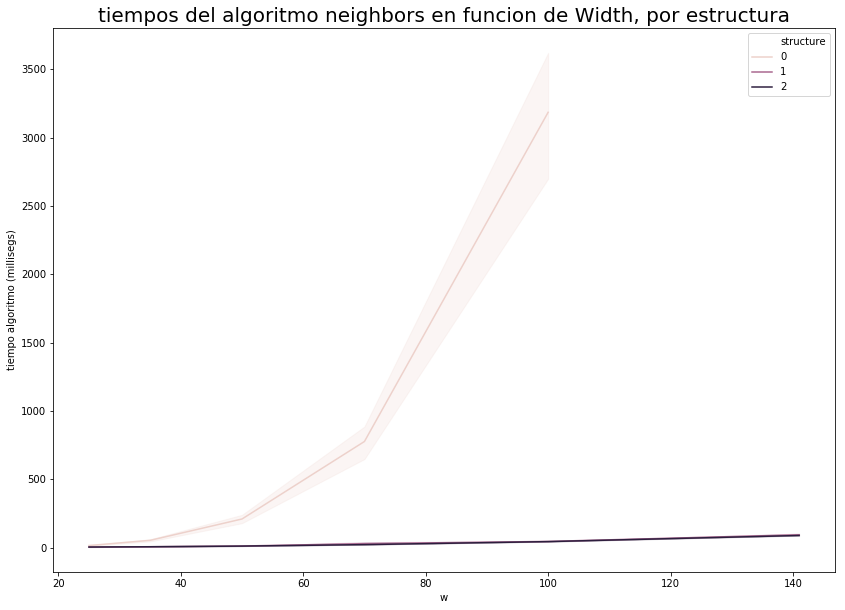

In [77]:
plt.figure(figsize=(14,10))
plt.title('tiempos del algoritmo neighbors en funcion de Width, por estructura', fontsize=20)

sns.lineplot(data=df[(df.w < 150)&(df['use8neighbors']==1)], x='w', hue='structure', y='tiempo algoritmo (millisegs)')
plt.savefig('tiempo 8neighbors por size y structure.png')

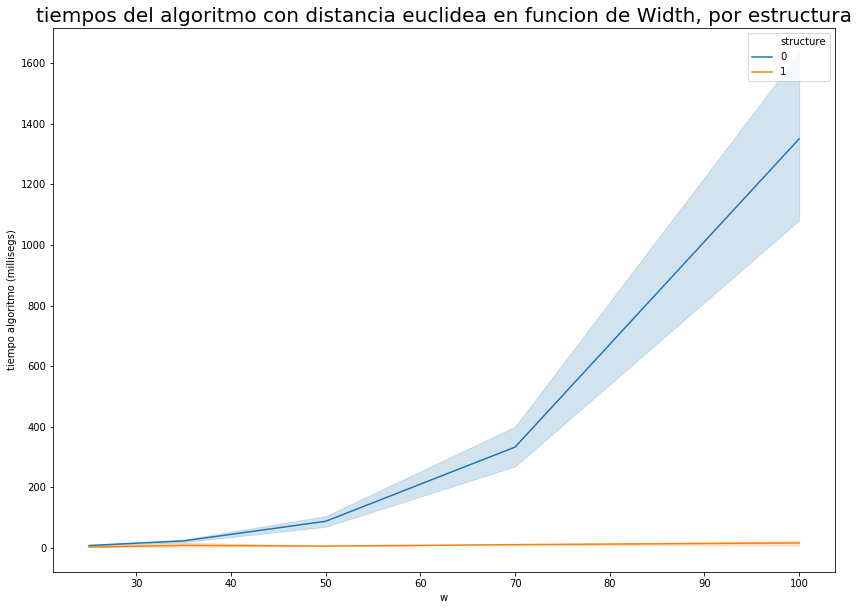

In [83]:
plt.figure(figsize=(14,10))
plt.title('tiempos del algoritmo con distancia euclidea en funcion de Width, por estructura', fontsize=20)


sns.lineplot(data=df[(df.w < 140)&(df['use8neighbors']==0)], x='w', hue='structure', y='tiempo algoritmo (millisegs)')
plt.savefig('tiempo euclideo por size y structure.png')

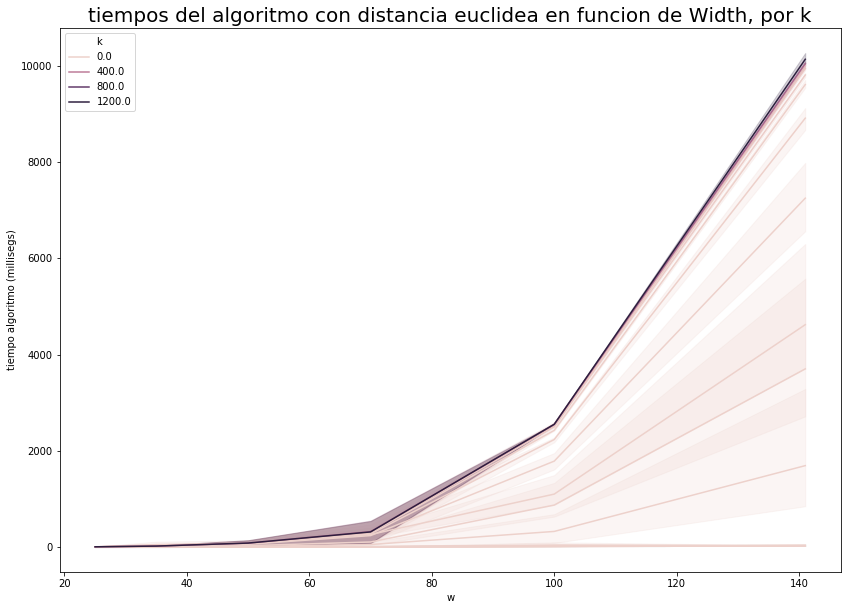

In [84]:
plt.figure(figsize=(14,10))
plt.title('tiempos del algoritmo con distancia euclidea en funcion de Width, por k', fontsize=20)

sns.lineplot(data=df[(df.w < 150)&(df['use8neighbors']==0)], x='w', hue='k', y='tiempo algoritmo (millisegs)')
plt.savefig('tiempo euclideo por size y k.png')

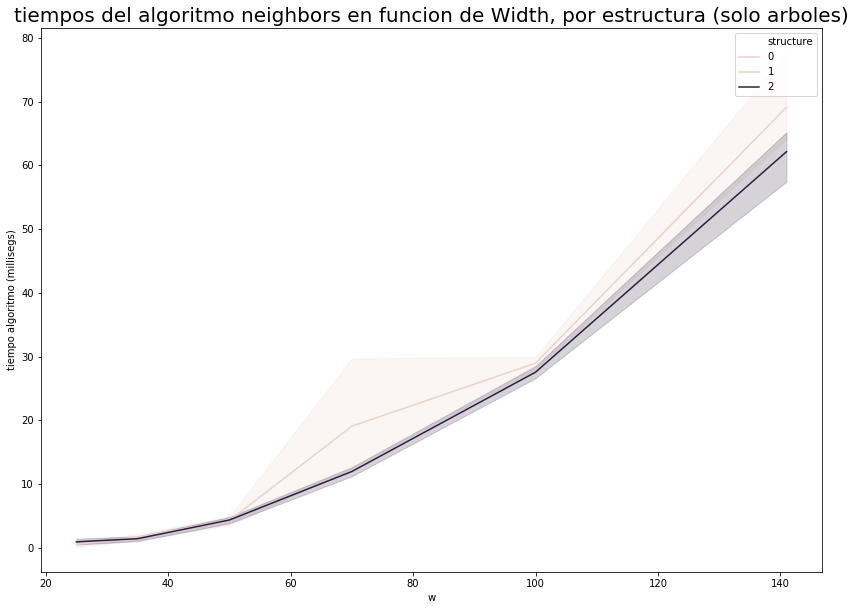

In [19]:
plt.figure(figsize=(14,10))
plt.title('tiempos del algoritmo neighbors en funcion de Width, por estructura (solo arboles)', fontsize=20)

sns.lineplot(data=df[(df.w < 150)&(df['use8neighbors']==1)&(df['structure']!=0)], x='w', hue='structure', y='tiempo algoritmo (millisegs)')
plt.savefig('tiempo neighbors por size y struct.png')

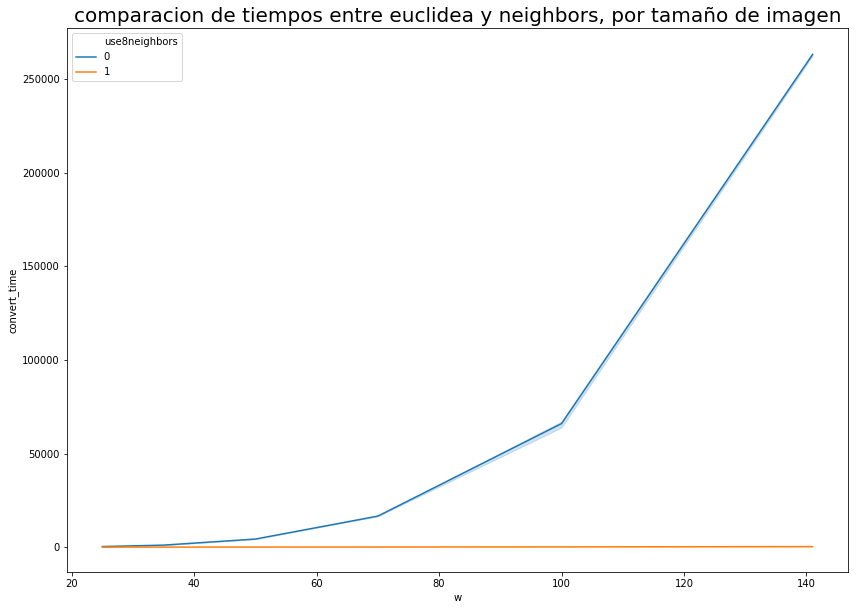

In [89]:
plt.figure(figsize=(14,10))
plt.title('comparacion de tiempos entre euclidea y neighbors, por tamaño de imagen', fontsize=20)

sns.lineplot(data=df[(df.w < 150)], x='w', hue='use8neighbors', y='convert_time')
plt.savefig('comparacion euclidea y neighbors.png')

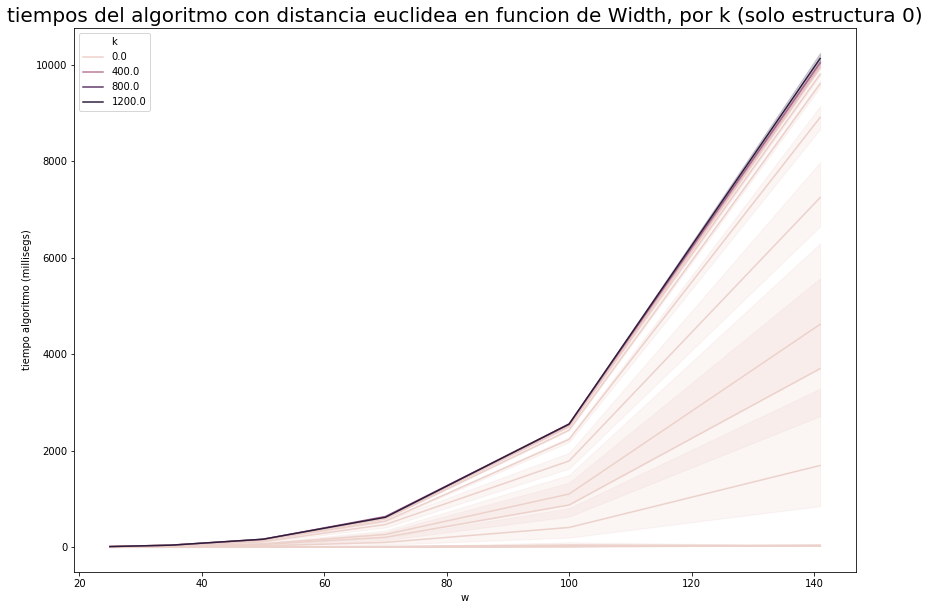

In [88]:
plt.figure(figsize=(14,10))
plt.title('tiempos del algoritmo con distancia euclidea en funcion de Width, por k (solo estructura 0)', fontsize=20)

sns.lineplot(data=df[(df.w < 150)&(df['use8neighbors']==0)&(df['structure']==0)], x='w', hue='k', y='tiempo algoritmo (millisegs)')
plt.savefig('tiempo euclideo por size y k solo struct 0.png')

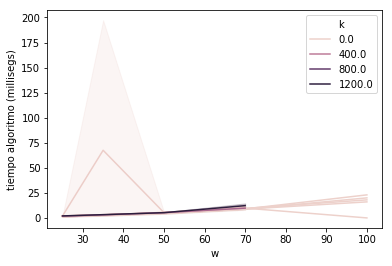

In [65]:
sns.lineplot(data=df[(df.w < 150)&(df['use8neighbors']==0)&(df['structure']!=0)], x='w', hue='k', y='tiempo algoritmo (millisegs)')